In [1]:
import tensorflow as tf
import os

In [3]:
ls D:\1jupyter\Datasets\pizza_steak

 Volume in drive D is 5Head 
 Volume Serial Number is 30B1-D4D0

 Directory of D:\1jupyter\Datasets\pizza_steak

25-09-2020  07:26    <DIR>          .
25-09-2020  07:26    <DIR>          ..
20-08-2020  09:51    <DIR>          test
20-08-2020  06:01    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  340,572,733,440 bytes free


In [4]:
ls D:\1jupyter\Datasets\pizza_steak\train

 Volume in drive D is 5Head 
 Volume Serial Number is 30B1-D4D0

 Directory of D:\1jupyter\Datasets\pizza_steak\train

20-08-2020  06:01    <DIR>          .
20-08-2020  06:01    <DIR>          ..
20-08-2020  06:01    <DIR>          pizza
20-08-2020  04:43    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  340,572,733,440 bytes free


In [7]:
ls D:\1jupyter\Datasets\pizza_steak\train\pizza

 Volume in drive D is 5Head 
 Volume Serial Number is 30B1-D4D0

 Directory of D:\1jupyter\Datasets\pizza_steak\train\pizza

20-08-2020  06:01    <DIR>          .
20-08-2020  06:01    <DIR>          ..
20-09-2019  17:35            45,555 1008104.jpg
20-09-2019  17:35            55,042 1008144.jpg
20-09-2019  17:35            48,090 1008844.jpg
20-09-2019  17:35            44,492 1008941.jpg
20-09-2019  17:35           118,923 1011404.jpg
20-09-2019  17:35            52,687 102037.jpg
20-09-2019  17:35            47,401 1026922.jpg
20-09-2019  17:35            76,126 1029698.jpg
20-09-2019  17:35            57,669 1033251.jpg
20-09-2019  17:35            64,285 1035854.jpg
20-09-2019  17:35            35,744 1038357.jpg
20-09-2019  17:35            51,637 1040878.jpg
20-09-2019  17:35            48,281 1044524.jpg
20-09-2019  17:35            64,412 1044789.jpg
20-09-2019  17:35            41,408 1047561.jpg
20-09-2019  17:35            38,317 1048649.jpg
20-09-2019  17:35            27

In [13]:
for dirpath, dirnames, filenames in os.walk(r"D:\1jupyter\Datasets\pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'D:\1jupyter\Datasets\pizza_steak'.
There are 2 directories and 0 images in 'D:\1jupyter\Datasets\pizza_steak\test'.
There are 0 directories and 250 images in 'D:\1jupyter\Datasets\pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'D:\1jupyter\Datasets\pizza_steak\test\steak'.
There are 2 directories and 0 images in 'D:\1jupyter\Datasets\pizza_steak\train'.
There are 0 directories and 750 images in 'D:\1jupyter\Datasets\pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'D:\1jupyter\Datasets\pizza_steak\train\steak'.


## NOW BUILDING THE MODEL

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras import Sequential

In [24]:
tf.random.set_seed(42)

train_datagen1 = ImageDataGenerator(rescale=1./255)
valid_datagen1 = ImageDataGenerator(rescale=1./255)

train_data1 = train_datagen1.flow_from_directory(r'D:\1jupyter\Datasets\pizza_steak\train',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)


valid_data1 = valid_datagen1.flow_from_directory(r'D:\1jupyter\Datasets\pizza_steak\test',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

model1 = Sequential()

model1.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model1.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='valid'))
model1.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model1.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model1.add(MaxPool2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist1 = model1.fit(train_data1,epochs=5, 
                   steps_per_epoch=len(train_data1),
                   validation_data=valid_data1,
                   validation_steps=len(valid_data1))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 6s 123ms/step - loss: 0.5614 - accuracy: 0.6907 - val_loss: 0.3894 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4032 - accuracy: 0.8173 - val_loss: 0.3372 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.4036 - accuracy: 0.8300 - val_loss: 0.3772 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 5s 100ms/step - loss: 0.3552 - accuracy: 0.8547 - val_loss: 0.3395 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.3083 - accuracy: 0.8733 - val_loss: 0.2957 - val_accuracy: 0.8760


In [23]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28090)            

In [27]:
tf.random.set_seed(42)

train_datagen2 = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

valid_datagen2 = ImageDataGenerator(rescale=1./255)

train_data2 = train_datagen2.flow_from_directory(r'D:\1jupyter\Datasets\pizza_steak\train',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)


valid_data2 = valid_datagen2.flow_from_directory(r'D:\1jupyter\Datasets\pizza_steak\test',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

model2 = Sequential()

model2.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model2.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='valid'))
model2.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model2.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist2 = model2.fit(train_data2,epochs=10, 
                   steps_per_epoch=len(train_data2),
                   validation_data=valid_data2,
                   validation_steps=len(valid_data2))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 20s 417ms/step - loss: 0.6485 - accuracy: 0.6293 - val_loss: 0.4888 - val_accuracy: 0.7660
Epoch 2/10
47/47 [==============================] - 19s 412ms/step - loss: 0.5311 - accuracy: 0.7467 - val_loss: 0.3942 - val_accuracy: 0.8160
Epoch 3/10
47/47 [==============================] - 19s 408ms/step - loss: 0.5101 - accuracy: 0.7593 - val_loss: 0.4576 - val_accuracy: 0.7780
Epoch 4/10
47/47 [==============================] - 19s 400ms/step - loss: 0.4807 - accuracy: 0.7833 - val_loss: 0.3287 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 19s 394ms/step - loss: 0.4464 - accuracy: 0.8053 - val_loss: 0.3161 - val_accuracy: 0.8640
Epoch 6/10
47/47 [==============================] - 19s 404ms/step - loss: 0.4722 - accuracy: 0.7960 - val_loss: 0.4042 - val_accuracy: 0.8220
Epoch 7/10
47/47 [==============================] - 17s 365

In [28]:
hist2.history

{'loss': [0.6484572291374207,
  0.5310643315315247,
  0.5101107954978943,
  0.4806916415691376,
  0.44643470644950867,
  0.472189724445343,
  0.4392407238483429,
  0.43883031606674194,
  0.40835249423980713,
  0.39756208658218384],
 'accuracy': [0.6293333172798157,
  0.746666669845581,
  0.7593333125114441,
  0.7833333611488342,
  0.8053333163261414,
  0.7960000038146973,
  0.8086666464805603,
  0.8100000023841858,
  0.8326666951179504,
  0.8266666531562805],
 'val_loss': [0.4888415038585663,
  0.39421218633651733,
  0.4576053321361542,
  0.32867667078971863,
  0.3160945177078247,
  0.40416282415390015,
  0.3224793076515198,
  0.30080026388168335,
  0.26684924960136414,
  0.3707362711429596],
 'val_accuracy': [0.765999972820282,
  0.8159999847412109,
  0.777999997138977,
  0.8539999723434448,
  0.8640000224113464,
  0.8220000267028809,
  0.8600000143051147,
  0.8880000114440918,
  0.8980000019073486,
  0.8420000076293945]}

In [30]:
import pandas as pd
loss_df = pd.DataFrame(data=hist2.history)

In [31]:
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.648457,0.629333,0.488842,0.766
1,0.531064,0.746667,0.394212,0.816
2,0.510111,0.759333,0.457605,0.778
3,0.480692,0.783333,0.328677,0.854
4,0.446435,0.805333,0.316095,0.864


<AxesSubplot:>

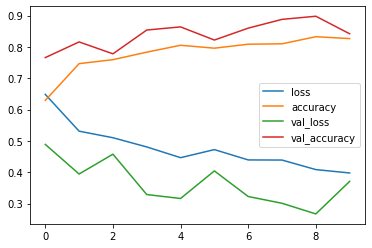

In [32]:
loss_df.plot()

In [33]:
tf.random.set_seed(42)

train_datagen3 = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

valid_datagen3 = ImageDataGenerator(rescale=1./255)

train_data3 = train_datagen3.flow_from_directory(r'D:\1jupyter\Datasets\pizza_steak\train',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42,
                                               shuffle=True)


valid_data3 = valid_datagen3.flow_from_directory(r'D:\1jupyter\Datasets\pizza_steak\test',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

model3 = Sequential()

model3.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model3.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2, padding='valid'))
model3.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model3.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2))
model3.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model3.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(units=1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist3 = model3.fit(train_data3,epochs=10, 
                   steps_per_epoch=len(train_data3),
                   validation_data=valid_data3,
                   validation_steps=len(valid_data3))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 17s 345ms/step - loss: 0.6791 - accuracy: 0.5300 - val_loss: 0.6659 - val_accuracy: 0.5820
Epoch 2/10
47/47 [==============================] - 16s 343ms/step - loss: 0.6032 - accuracy: 0.6807 - val_loss: 0.5293 - val_accuracy: 0.7380
Epoch 3/10
47/47 [==============================] - 16s 346ms/step - loss: 0.5788 - accuracy: 0.7027 - val_loss: 0.4956 - val_accuracy: 0.7700
Epoch 4/10
47/47 [==============================] - 16s 340ms/step - loss: 0.5278 - accuracy: 0.7360 - val_loss: 0.4134 - val_accuracy: 0.8340
Epoch 5/10
47/47 [==============================] - 16s 342ms/step - loss: 0.4956 - accuracy: 0.7667 - val_loss: 0.3913 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 16s 339ms/step - loss: 0.5006 - accuracy: 0.7680 - val_loss: 0.3797 - val_accuracy: 0.8540
Epoch 7/10
47/47 [==============================] - 16s 342